In [202]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()
from sklearn.preprocessing import LabelEncoder
import time
import pickle
from matplotlib import gridspec
from scipy import stats

In [203]:
df=pd.read_csv("input/Crop_recommendation.csv")

In [204]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [205]:
df['label'].value_counts()
# Equal Distribution of Crops

papaya         100
grapes         100
chickpea       100
apple          100
rice           100
mango          100
coffee         100
jute           100
watermelon     100
mungbean       100
blackgram      100
orange         100
mothbeans      100
coconut        100
maize          100
pomegranate    100
pigeonpeas     100
wheat          100
cotton         100
kidneybeans    100
muskmelon      100
banana         100
Name: label, dtype: int64

In [206]:
df.isnull().sum()
#No Null Values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [207]:
df.duplicated().value_counts()
#No  Duplicate Values

False    2200
dtype: int64

In [208]:
le=LabelEncoder()
y=le.fit_transform(df['label'])

In [210]:
mapping = dict(zip(le.classes_, range(len(le.classes_))))


In [211]:
df['encoded_y']=y

In [213]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,encoded_y
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,19
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,19
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,19
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,19
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,19
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [212]:
mapping

{'apple': 0,
 'banana': 1,
 'blackgram': 2,
 'chickpea': 3,
 'coconut': 4,
 'coffee': 5,
 'cotton': 6,
 'grapes': 7,
 'jute': 8,
 'kidneybeans': 9,
 'maize': 10,
 'mango': 11,
 'mothbeans': 12,
 'mungbean': 13,
 'muskmelon': 14,
 'orange': 15,
 'papaya': 16,
 'pigeonpeas': 17,
 'pomegranate': 18,
 'rice': 19,
 'watermelon': 20,
 'wheat': 21}

In [214]:
inverse_mapper={}
for k,v in mapping.items():
    inverse_mapper[v]=k

In [215]:
inverse_mapper

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'maize',
 11: 'mango',
 12: 'mothbeans',
 13: 'mungbean',
 14: 'muskmelon',
 15: 'orange',
 16: 'papaya',
 17: 'pigeonpeas',
 18: 'pomegranate',
 19: 'rice',
 20: 'watermelon',
 21: 'wheat'}

In [89]:
le.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'maize', 'mango',
       'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon', 'wheat'],
      dtype=object)

In [90]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,encoded_y
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


In [194]:
def three_chart(df, feature):
    fig = plt.figure (constrained_layout=False ,figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0:1, :2])
    ax1.set_title('Distribution')
    
    sns.histplot(df.loc[:, feature], ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1:, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(y=df.loc[:,feature] ,ax = ax3 )


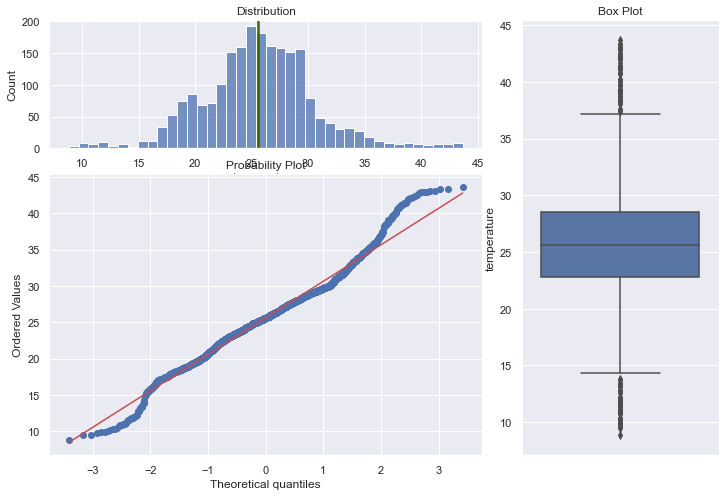

In [195]:
three_chart(df,"temperature")

<AxesSubplot:xlabel='temperature', ylabel='ph'>

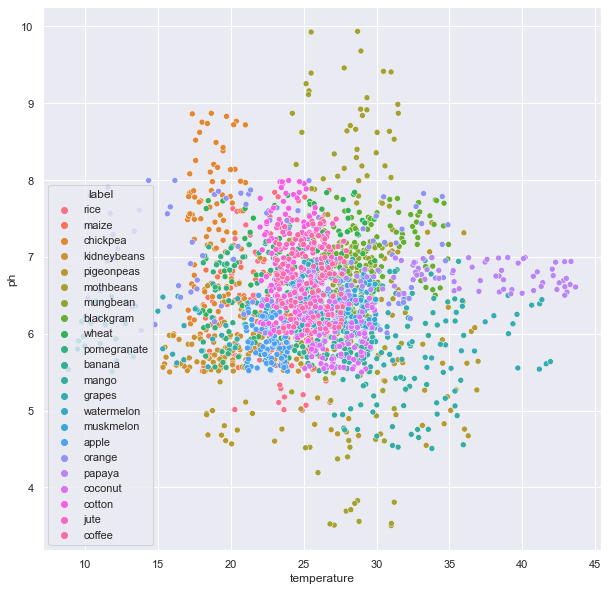

In [92]:
fig=plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x="temperature",y="ph",hue="label")

#We Can see clusters of Crop Varitetes which are almost together when we consider the temperature and ph .

In [93]:
from sklearn.manifold import TSNE 
tsne=TSNE().fit_transform(df.drop("label",axis=1))


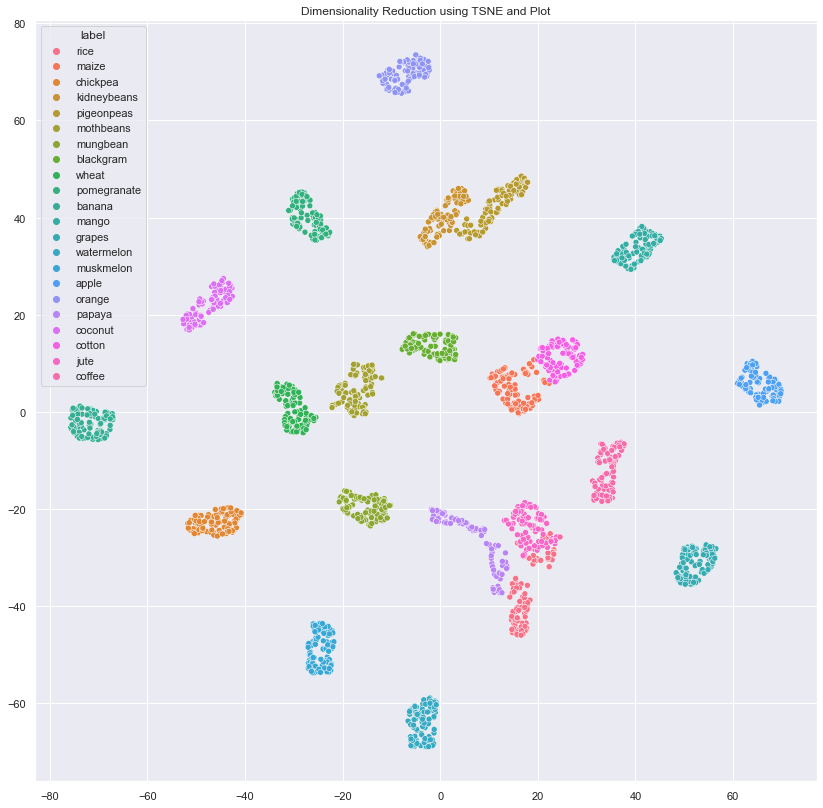

In [94]:
fig=plt.figure(figsize=(14,14))
sns.scatterplot(data=tsne,x=tsne[:,0],y=tsne[:,1],hue=df['label'])
plt.title("Dimensionality Reduction using TSNE and Plot");

**With Dimensionality Reduction , all the clusters are segregated in a distinct manner which indicates machine learning algorithms can perform well on this data.**

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report

In [97]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,encoded_y
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,19
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,19
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,19
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,19
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,19


**Tree Based Models Doesnt need Feature Scaling  and they just Need Label Encoding .On the Analysis of Data we can figure out Tree Family models work fine on this dataset ,so lets use Dtree and Random forest instead of Gradient Boosting Models to save time and reduce Latency**

Lets use Cross Validation of 5 K Folds to test the model and choose the model which better score on the folds.

In [98]:
df['kfold']=-1

sfold=StratifiedKFold(n_splits=5)
for index,(train_,val_) in enumerate (sfold.split(df.drop("label",axis=1), df['label'])):
    df.loc[val_,"kfold"]=index

In [107]:
def cross_val(model):
    acc=[]
    for i in range(5):
        
        train_x=df[df['kfold']!=i].drop(["label","encoded_y"],axis=1)
        train_y=df[df['kfold']!=i]["encoded_y"]
        test_x=df[df['kfold']==i].drop(["label","encoded_y"],axis=1)
        train_y=df[df['kfold']==i]["encoded_y"]
        
        model.fit(X_train,y_train)
        start=time.time()
        preds=model.predict(X_test)
        end=time.time()
        
        
        print(f"Accuracy of {i} fold : {accuracy_score(y_test,preds)} ")
        if(i==4):
            print(classification_report(y_test,preds))
            print(f"Latency : {end-start}")
            
        acc.append(accuracy_score(y_test,preds))
    print("Aggregated Accuracy " ,np.mean(acc))

In [110]:
dtree=DecisionTreeClassifier()
cross_val(dtree)

Accuracy of 0 fold : 0.977961432506887 
Accuracy of 1 fold : 0.9862258953168044 
Accuracy of 2 fold : 0.9793388429752066 
Accuracy of 3 fold : 0.977961432506887 
Accuracy of 4 fold : 0.9807162534435262 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        33
           2       0.97      0.94      0.95        33
           3       1.00      1.00      1.00        33
           4       0.97      1.00      0.99        33
           5       1.00      1.00      1.00        33
           6       0.97      1.00      0.99        33
           7       1.00      1.00      1.00        33
           8       0.85      0.88      0.87        33
           9       1.00      1.00      1.00        33
          10       0.97      0.97      0.97        33
          11       1.00      1.00      1.00        33
          12       0.97      0.97      0.97        33
          13       1.00      1.00      1

In [111]:
rf=RandomForestClassifier()
cross_val(rf)

Accuracy of 0 fold : 0.9931129476584022 
Accuracy of 1 fold : 0.9917355371900827 
Accuracy of 2 fold : 0.9931129476584022 
Accuracy of 3 fold : 0.9931129476584022 
Accuracy of 4 fold : 0.9931129476584022 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        33
           2       1.00      0.97      0.98        33
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        33
           6       0.97      1.00      0.99        33
           7       1.00      1.00      1.00        33
           8       0.92      1.00      0.96        33
           9       1.00      1.00      1.00        33
          10       0.97      0.97      0.97        33
          11       1.00      1.00      1.00        33
          12       1.00      1.00      1.00        33
          13       1.00      1.00     

In [197]:
#Random Forest Model outperfroms Decison Tree by 1% . Its latency is higher than Decision Tree by some percent but lets choose it for now .

In [198]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,encoded_y,kfold
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,19,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,19,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,19,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,19,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,19,0
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5,4
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5,4
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5,4
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5,4


In [199]:
rtree=RandomForestClassifier()
rtree.fit(df.drop(['label','encoded_y','kfold'],axis=1),df['encoded_y'])
# Random Forest model trained on the whole dataset

RandomForestClassifier()

In [200]:
filename = 'finalized_model.sav'
pickle.dump(rtree, open(filename, 'wb'))

In [ ]:
#Savining the Model with pickle.

**Model Interpretation**

In [121]:
!pip install shap
import shap
shap.initjs

<function shap.plots._force.initjs()>

In [122]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

In [125]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["label","encoded_y"],axis=1), df['encoded_y'], test_size=0.33, random_state=42,stratify=y)
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)

In [126]:
explainer =shap.Explainer(rtree.predict,X_train)
shap_values=explainer(X_test)

Exact explainer: 727it [10:14,  1.18it/s]                                                                              


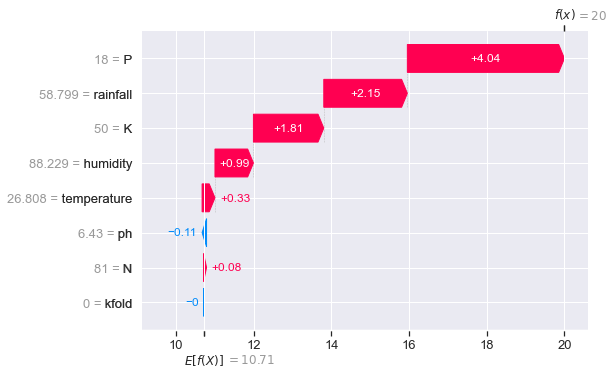

In [127]:
shap.plots.waterfall(shap_values[5])

In [201]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,encoded_y,kfold
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,19,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,19,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,19,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,19,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,19,0
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5,4
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5,4
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5,4
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5,4


In [ ]:
array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'maize', 'mango',
       'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon', 'wheat']